In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_excel('aprov_alunos.xlsx')
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


<Axes: xlabel='ano_2015', ylabel='ano_2016'>

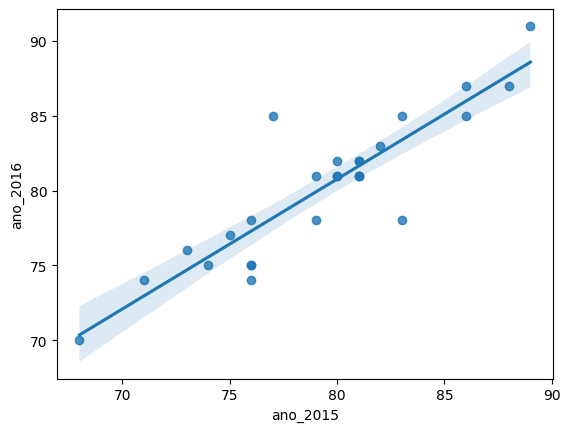

In [6]:
sns.regplot(data=df, x='ano_2015', y='ano_2016')

In [7]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [8]:
x = df[['ano_2015']]
y = df[['ano_2016']]

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(x_train, y_train);

In [29]:
rsq = lr.score(x_train, y_train)
rsq

0.8800910056640276

In [24]:
y_pred_train = lr.predict(x_train)
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_train, y_pred_train)))

MSE: 3.0637971614007617
MAE: 1.3257494710315474
RMAE: 1.1514119467121866


In [25]:
y_pred_test = lr.predict(x_test)
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_test)))


MSE: 9.855433680482752
MAE: 2.1328424030620687
RMAE: 1.460425418520942
